In [42]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pylab import rcParams

In [43]:
#don't forget this line
%matplotlib inline


matplotlib.style.use('ggplot')

In [61]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

In [61] used 0.023 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 116.844 MiB
In [61] used 0.023 MiB RAM in 0.102s, peaked 0.000 MiB above current, total RAM usage 116.844 MiB


In [3]:
from ipython_memwatcher import MemWatcher
mw = MemWatcher()
mw.start_watching_memory()

In [3] used 0.117 MiB RAM in 0.102s, peaked 0.000 MiB above current, total RAM usage 74.277 MiB
In [3] used 0.023 MiB RAM in 0.101s, peaked 0.000 MiB above current, total RAM usage 74.277 MiB


In [7]:
retval = os.getcwd()
retval

'D:\\NZ_NewStart\\lectures\\practial data mining\\lotto_dataset_v1.0'

In [7] used 0.004 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 76.469 MiB


In [2]:
path='D:\\NZ_NewStart\\lectures\\practial data mining\\lotto_dataset_v1.0'
os.chdir( path )
retval = os.getcwd()
retval

'D:\\NZ_NewStart\\lectures\\practial data mining\\lotto_dataset_v1.0'

In [3]:
draw_sales=pd.read_csv("factDrawSalesa_MDP.csv",index_col=None,nrows=1000)

In [7]:
draw_sales.shape

(1000, 10)

In [7] used 0.012 MiB RAM in 0.005s, peaked 0.000 MiB above current, total RAM usage 78.391 MiB
In [7] used 0.012 MiB RAM in 0.104s, peaked 0.000 MiB above current, total RAM usage 78.391 MiB


In [6]:
draw_sales.head(3)

,Unnamed: 0,factDrawSalesKey,dimProductKey,dimRetailerKey,dimDrawKey,dimDateKey,dimPurchasePeriodkey,drawSalesAmount,ticketPurchaseAmount,ticketPurchaseCount
0,1,36307211,22,888,15784,20160401,2,24.0,24.0,0.0
1,2,58623470,451,2846,15855,20161207,1,2.4,2.4,1.0
2,3,34556685,22,3043,15778,20160311,2,108.0,108.0,17.0


In [6] used 0.199 MiB RAM in 0.022s, peaked 0.000 MiB above current, total RAM usage 75.863 MiB


In [4]:
draw_sales_tmp=draw_sales[draw_sales.dimProductKey.isin([12,22,451])]

In [5]:
draw_sales_tmp.head(3)

,Unnamed: 0,factDrawSalesKey,dimProductKey,dimRetailerKey,dimDrawKey,dimDateKey,dimPurchasePeriodkey,drawSalesAmount,ticketPurchaseAmount,ticketPurchaseCount
0,1,36307211,22,888,15784,20160401,2,24.0,24.0,0.0
1,2,58623470,451,2846,15855,20161207,1,2.4,2.4,1.0
2,3,34556685,22,3043,15778,20160311,2,108.0,108.0,17.0


In [15]:
draw_sales_tmp.shape

(11563005, 10)

In [15] used 0.000 MiB RAM in 0.000s, peaked 0.000 MiB above current, total RAM usage 2482.309 MiB


In [13]:
draw_sales_tmp.factDrawSalesKey.nunique()

11736499

In [13] used 0.094 MiB RAM in 1.269s, peaked 386.777 MiB above current, total RAM usage 2496.895 MiB


In [6]:
#dimRetailer_Updated_AKL_WGTN_CHCH
three_retailer=pd.read_csv("dimRetailer_Updated_AKL_WGTN_CHCH.csv",index_col=None)
three_retailer.head(2)

,﻿dim_retailer_key,retail_outlet_status_description,territorial_local_authority_name,territorial_local_authority_description,zone_name,suburb_name,city_name,region_name,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1771,Active,Howick Ward,Unknown,Auckland,Lotto Kiosk,1 Ara-Tai Road,Auckland,Not Top 130 Retailer,NaN,NaN
1,2450,Terminated,Unknown,Unknown,Auckland,Balmoral,Auckland,Unknown,NaN,NaN,NaN


In [40]:
three_retailer.ix[:,0:2].head(2)

,dimRetailerKey,retail_outlet_status_description
0,1771,Active
1,2450,Terminated


In [40] used -0.094 MiB RAM in 0.010s, peaked 0.000 MiB above current, total RAM usage 80.977 MiB
In [40] used -0.094 MiB RAM in 0.107s, peaked 0.000 MiB above current, total RAM usage 80.977 MiB


In [7]:
three_retailer.columns.values[0]="dimRetailerKey"
three_retailer.columns

Index(['dimRetailerKey', 'retail_outlet_status_description',
       'territorial_local_authority_name',
       'territorial_local_authority_description', 'zone_name', 'suburb_name',
       'city_name', 'region_name', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [8]:
#draw_sales_tmp.iloc[:,[0,3]]
three_retailer_part=three_retailer.iloc[:,0:7]
three_retailer_part.head(2)

,dimRetailerKey,retail_outlet_status_description,territorial_local_authority_name,territorial_local_authority_description,zone_name,suburb_name,city_name
0,1771,Active,Howick Ward,Unknown,Auckland,Lotto Kiosk,1 Ara-Tai Road
1,2450,Terminated,Unknown,Unknown,Auckland,Balmoral,Auckland


In [9]:
draw_sales_three=pd.merge(draw_sales_tmp,three_retailer_part)
draw_sales_three=draw_sales_three.iloc[:,1:]

In [10]:
draw_sales_three.head(2)

,factDrawSalesKey,dimProductKey,dimRetailerKey,dimDrawKey,dimDateKey,dimPurchasePeriodkey,drawSalesAmount,ticketPurchaseAmount,ticketPurchaseCount,retail_outlet_status_description,territorial_local_authority_name,territorial_local_authority_description,zone_name,suburb_name,city_name
0,58623470,451,2846,15855,20161207,1,2.4,2.4,1.0,Active,Waitakere Ward,Unknown,Auckland,17-19 Fred Taylor Drive,Westgate
1,34556685,22,3043,15778,20160311,2,108.0,108.0,17.0,Active,Whau Ward,Unknown,Auckland,Blockhouse Bay,Auckland


In [58]:
draw_sales_three.to_csv("draw_sales_three_city.csv")

In [58] used 0.008 MiB RAM in 0.007s, peaked 0.000 MiB above current, total RAM usage 81.852 MiB
In [58] used 0.008 MiB RAM in 0.107s, peaked 0.000 MiB above current, total RAM usage 81.852 MiB


In [62]:
draw_sales_three.head(2)

,factDrawSalesKey,dimProductKey,dimRetailerKey,dimDrawKey,dimDateKey,dimPurchasePeriodkey,drawSalesAmount,ticketPurchaseAmount,ticketPurchaseCount,retail_outlet_status_description,territorial_local_authority_name,territorial_local_authority_description,zone_name,suburb_name,city_name
0,58623470,451,2846,15855,20161207,1,2.4,2.4,1.0,Active,Waitakere Ward,Unknown,Auckland,17-19 Fred Taylor Drive,Westgate
1,34556685,22,3043,15778,20160311,2,108.0,108.0,17.0,Active,Whau Ward,Unknown,Auckland,Blockhouse Bay,Auckland


In [62] used 0.059 MiB RAM in 0.017s, peaked 0.000 MiB above current, total RAM usage 116.902 MiB
In [62] used 0.059 MiB RAM in 0.117s, peaked 0.000 MiB above current, total RAM usage 116.902 MiB


In [11]:
_ =draw_sales_three['drawSalesAmount'].hist(by= draw_sales_three['zone_name'] , figsize=(15, 15), sharey=True, sharex=True, bins=int(np.sqrt(len(draw_sales_three))), color='grey')

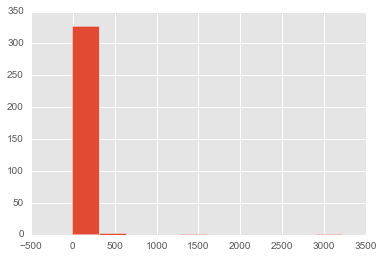

In [45]:
#draw_sales_three['drawSalesAmount'].hist()
_=draw_sales_three.drawSalesAmount.hist()

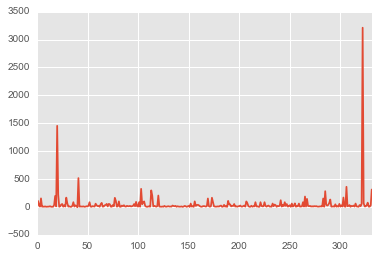

In [44]:
draw_sales_three['drawSalesAmount'].plot()

In [27]:
draw_sales_three_test=draw_sales_three.iloc[0:10,:]

In [23]:
type(draw_sales_three_test)

pandas.core.frame.DataFrame

In [28]:
draw_sales_three_test=draw_sales_three_test.drawSalesAmount
#_ =draw_sales_three_test.plot()

In [36]:
draw_sales_three.head(1)

,factDrawSalesKey,dimProductKey,dimRetailerKey,dimDrawKey,dimDateKey,dimPurchasePeriodkey,drawSalesAmount,ticketPurchaseAmount,ticketPurchaseCount,retail_outlet_status_description,territorial_local_authority_name,territorial_local_authority_description,zone_name,suburb_name,city_name
0,58623470,451,2846,15855,20161207,1,2.4,2.4,1.0,Active,Waitakere Ward,Unknown,Auckland,17-19 Fred Taylor Drive,Westgate


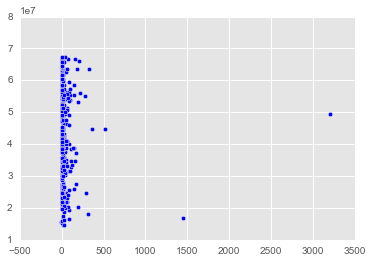

In [46]:
#draw_sales_three_test.plot()
_=plt.scatter(draw_sales_three.drawSalesAmount,draw_sales_three.factDrawSalesKey)

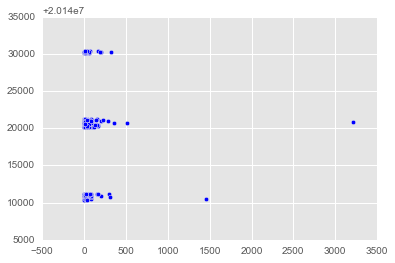

In [47]:
_=plt.scatter(draw_sales_three.drawSalesAmount,draw_sales_three.dimDateKey)

In [31]:
draw_sales_three_test

0      2.4
1    108.0
2     27.0
3      4.8
4    153.0
5      4.0
6      6.0
7      3.0
8      9.0
9      2.4
Name: drawSalesAmount, dtype: float64

In [8]:
daily_sales=pd.read_csv("subsetfactDailySales.csv",index_col=None,nrows=1000)
#daily_sales=pd.read_csv("subsetfactDailySales.csv",index_col=None)

In [8] used 0.012 MiB RAM in 0.007s, peaked 0.000 MiB above current, total RAM usage 76.336 MiB


In [5]:
daily_sales.head(2)

,Unnamed: 0,factDailySalesKey,dimProductKey,dimRetailerKey,dimDateKey,transactionDate,cancelCount,cancelAmount,salesCount,salesAmount,sos_salesCount,bonusTicketAmount,bonusTicketCount
0,1,9201510,14,2016,20150301,2015-03-01,0,0,46,280.0,0,8,2
1,2,9201511,22,2016,20150301,2015-03-01,0,0,9,318.6,0,0,0


In [5] used 0.227 MiB RAM in 0.013s, peaked 0.000 MiB above current, total RAM usage 76.203 MiB


In [9]:
daily_sales_tmp=daily_sales[daily_sales.dimProductKey.isin([12,22,451])]

In [9] used 0.016 MiB RAM in 0.000s, peaked 0.000 MiB above current, total RAM usage 76.352 MiB


In [10]:
daily_sales_tmp.shape

(167, 13)

In [10] used 0.000 MiB RAM in 0.000s, peaked 0.000 MiB above current, total RAM usage 76.352 MiB


In [20]:
daily_sales_tmp.head(2)

,Unnamed: 0,factDailySalesKey,dimProductKey,dimRetailerKey,dimDateKey,transactionDate,cancelCount,cancelAmount,salesCount,salesAmount,sos_salesCount,bonusTicketAmount,bonusTicketCount
1,2,9201511,22,2016,20150301,2015-03-01,0,0.0,9,318.6,0,0,0
7,8,9199071,12,1811,20150301,2015-03-01,0,0.0,6,7.0,0,5,5


In [20] used 0.055 MiB RAM in 0.016s, peaked 0.000 MiB above current, total RAM usage 3888.805 MiB


In [ ]:
daily_sales_tmp[daily_sales_tmp.dimDateKey='']

In [3]:
dim_product=pd.read_csv("dimProduct.csv")
dim_product.head()

,dim_product_key,product_number,product_type_code,product_description,product_family_code,product_family_description,online_flag,instant_flag,product_type,product_reporting_seq,...,product_size_description,product_width,product_height,product_colour_description,product_area,product_category,product_category_sort,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,0,0,0,Unknown,NaN,Unknown,Unk,Unk,Unknown,NaN,...,Unknown,0,0,Unknown,0,Unknown,0,NaN,NaN,NaN
1,1,1,1,01 $3 EDREAM,3.0,Instant Kiwi,No,Yes,Instant,9999.0,...,Not Used,0,0,Not Used,0,Instant Kiwi,30,NaN,NaN,NaN
2,2,2,2,Promotions,0.0,Undefined,No,No,Undefined,9999.0,...,Not Used,0,0,Not Used,0,Undefined,90,NaN,NaN,NaN
3,3,3,1,03 $8 K XMAS,3.0,Instant Kiwi,No,Yes,Instant,9999.0,...,Not Used,0,0,Not Used,0,Instant Kiwi,30,NaN,NaN,NaN
4,4,4,1,04 $3 AUTMNX,3.0,Instant Kiwi,No,Yes,Instant,9999.0,...,Not Used,0,0,Not Used,0,Instant Kiwi,30,NaN,NaN,NaN


In [4]:
dim_product.shape

(577, 44)

In [40]:
lotto_product=dim_product[dim_product.product_family_code==1]
#lotto_product.info()

In [41]:
lotto_product.shape

(3, 44)

In [42]:
#product_number must be 12,20 and 70 in terms of thish project
lotto_product

,dim_product_key,product_number,product_type_code,product_description,product_family_code,product_family_description,online_flag,instant_flag,product_type,product_reporting_seq,...,product_size_description,product_width,product_height,product_colour_description,product_area,product_category,product_category_sort,Unnamed: 41,Unnamed: 42,Unnamed: 43
12,12,12,0,Strike,1.0,Lotto,Yes,No,Online,3.0,...,Not Used,0,0,Not Used,0,Large Jackpot Games,10,NaN,NaN,NaN
22,22,20,0,Lotto/Powerball,1.0,Lotto,Yes,No,Online,1.0,...,Not Used,0,0,Not Used,0,Large Jackpot Games,10,NaN,NaN,NaN
450,451,70,0,Powerball,1.0,Lotto,Yes,No,Online,2.0,...,Not Used,0,0,Not Used,0,Large Jackpot Games,10,NaN,NaN,NaN


In [44]:
lotto_product.to_csv(".\\lotto_product.csv")

In [3]:
dim_draw=pd.read_csv("dimDraw.csv")
lotto_draw=dim_draw[dim_draw.productNumber.isin([12,20,70])]
lotto_draw.head()

d:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dimDrawKey,drawNumber,productNumber,drawProduct,drawDescription,drawDate,jackpot,jackpotCycle,supplementaryJackpot,promotion,...,familyjackpot,currentDraw,currentDrawDay,drawDatetime,currentDrawSameJackpot,JackpotAmount,PreviousDrawSameJackpot,CurrentDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDayRank
4,4,1,20,Lotto Powerball,1 - Lotto Powerball,19870801,Unknown,0,Unknown,Unknown,...,Unknown,No,No,1/08/1987 19:01,No,0,No,No,No,NaN
8,8,2,20,Lotto Powerball,2 - Lotto Powerball,19870808,Unknown,0,Unknown,Unknown,...,Unknown,No,No,8/08/1987 19:01,No,0,No,No,No,NaN
12,12,3,20,Lotto Powerball,3 - Lotto Powerball,19870815,Unknown,0,Unknown,Unknown,...,Unknown,No,No,15/08/1987 19:01,No,0,No,No,No,NaN
16,16,4,20,Lotto Powerball,4 - Lotto Powerball,19870822,Unknown,0,Unknown,Unknown,...,Unknown,No,No,22/08/1987 19:01,No,0,No,No,No,NaN
20,20,5,20,Lotto Powerball,5 - Lotto Powerball,19870829,Unknown,0,Unknown,Unknown,...,Unknown,No,No,29/08/1987 19:01,No,0,No,No,No,NaN


In [35]:
lotto_draw.shape

(4504, 42)

In [35] used 0.004 MiB RAM in 0.000s, peaked 0.000 MiB above current, total RAM usage 113.504 MiB


In [41]:
lotto_draw.ix[:,0:10].head()

,dimDrawKey,drawNumber,productNumber,drawProduct,drawDescription,drawDate,jackpot,jackpotCycle,supplementaryJackpot,promotion
4,4,1,20,Lotto Powerball,1 - Lotto Powerball,19870801,Unknown,0,Unknown,Unknown
8,8,2,20,Lotto Powerball,2 - Lotto Powerball,19870808,Unknown,0,Unknown,Unknown
12,12,3,20,Lotto Powerball,3 - Lotto Powerball,19870815,Unknown,0,Unknown,Unknown
16,16,4,20,Lotto Powerball,4 - Lotto Powerball,19870822,Unknown,0,Unknown,Unknown
20,20,5,20,Lotto Powerball,5 - Lotto Powerball,19870829,Unknown,0,Unknown,Unknown


In [41] used 0.293 MiB RAM in 0.016s, peaked 0.000 MiB above current, total RAM usage 114.309 MiB


In [30]:
lotto_draw_01=lotto_draw.ix[:,['dimDrawKey','productNumber','jackpot','jackpotCycle','supplementaryJackpot','promotion']]

In [31]:
lotto_draw_01.shape

(4504, 6)

In [19]:
lotto_draw_01[lotto_draw_01.jackpotCycle!=0].head()

,dimDrawKey,productNumber,drawDate,jackpot,jackpotCycle,supplementaryJackpot,promotion
4209,4209,20,20060520,$17.5m,1,$1.0m,No Promotion
4210,4210,12,20060520,$500k,1,No Jackpot,No Promotion
4213,4213,20,20060527,$1.0m,1,$1.0m,No Promotion
4214,4214,12,20060527,$700k,2,No Jackpot,No Promotion
4217,4217,20,20060603,$1.5m,2,$1.0m,No Promotion


In [42]:
lotto_draw.ix[:,11:20].head()

,updateAuditKey,etlSource,dss_update_time,drawTime,drawTimeDescription,drawdayweek,drawdaysort,jackpotRun,JackpotRunDescription
4,NaN,stg_ia_winner_online_historical,46:34.9,19:01:00,7:00 p.m.,Saturday,7,0,0 Jackpot Run
8,NaN,stg_ia_winner_online_historical,46:34.9,19:01:00,7:00 p.m.,Saturday,7,0,0 Jackpot Run
12,NaN,stg_ia_winner_online_historical,46:34.9,19:01:00,7:00 p.m.,Saturday,7,0,0 Jackpot Run
16,NaN,stg_ia_winner_online_historical,46:34.9,19:01:00,7:00 p.m.,Saturday,7,0,0 Jackpot Run
20,NaN,stg_ia_winner_online_historical,46:34.9,19:01:00,7:00 p.m.,Saturday,7,0,0 Jackpot Run


In [42] used 0.281 MiB RAM in 0.016s, peaked 0.000 MiB above current, total RAM usage 114.590 MiB


In [20]:
lotto_draw[(lotto_draw.updateAuditKey.notnull()) & (lotto_draw.updateAuditKey!=0.0)].head()

,dimDrawKey,drawNumber,productNumber,drawProduct,drawDescription,drawDate,jackpot,jackpotCycle,supplementaryJackpot,promotion,...,familyjackpot,currentDraw,currentDrawDay,drawDatetime,currentDrawSameJackpot,JackpotAmount,PreviousDrawSameJackpot,CurrentDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDayRank


In [21]:
lotto_draw_02=lotto_draw.ix[:,['drawdayweek']]

In [23]:
lotto_draw_02.shape

(4504, 1)

In [43]:
lotto_draw.ix[:,21:30].head()

,lotto_jackpot_amount,pball_jackpot_id,pball_jackpot_amount,strike_jackpot_id,strike_jackpot_amount,bullseye_jackpot_id,bullseye_jackpot_amount,pbjackpot_1m,pbjackpot_1m_desc
4,Unknown,999999,Unknown,999999,Unknown,999999,Unknown,1000,Unknown
8,Unknown,999999,Unknown,999999,Unknown,999999,Unknown,1000,Unknown
12,Unknown,999999,Unknown,999999,Unknown,999999,Unknown,1000,Unknown
16,Unknown,999999,Unknown,999999,Unknown,999999,Unknown,1000,Unknown
20,Unknown,999999,Unknown,999999,Unknown,999999,Unknown,1000,Unknown


In [43] used 0.309 MiB RAM in 0.016s, peaked 0.000 MiB above current, total RAM usage 114.898 MiB


In [24]:
lotto_draw_03=lotto_draw.ix[:,['lotto_jackpot_amount','pball_jackpot_id','pball_jackpot_amount','strike_jackpot_id','strike_jackpot_amount','pbjackpot_1m']]

In [25]:
lotto_draw_03.shape

(4504, 6)

In [8]:
lotto_draw.ix[:,21:30][lotto_draw.lotto_jackpot_amount!='Unknown' ].head()

,lotto_jackpot_amount,pball_jackpot_id,pball_jackpot_amount,strike_jackpot_id,strike_jackpot_amount,bullseye_jackpot_id,bullseye_jackpot_amount,pbjackpot_1m,pbjackpot_1m_desc
4209,$1.0m,17500,$17.5m,500,$500k,999999,Unknown,16,16 - 17m
4210,$1.0m,17500,$17.5m,500,$500k,999999,Unknown,16,16 - 17m
4213,$1.0m,1000,$1.0m,700,$700k,999999,Unknown,0,0 - 1m
4214,$1.0m,1000,$1.0m,700,$700k,999999,Unknown,0,0 - 1m
4217,$1.0m,1500,$1.5m,800,$800k,999999,Unknown,0,0 - 1m


In [13]:
lotto_draw.ix[:,21:30][lotto_draw.bullseye_jackpot_amount!='Unknown' ].head()

,lotto_jackpot_amount,pball_jackpot_id,pball_jackpot_amount,strike_jackpot_id,strike_jackpot_amount,bullseye_jackpot_id,bullseye_jackpot_amount,pbjackpot_1m,pbjackpot_1m_desc
4925,$1.0m,5000,$5.0m,400,$400k,105,$105k,4,4 - 5m
4926,$1.0m,5000,$5.0m,400,$400k,105,$105k,4,4 - 5m
4929,$1.0m,3000,$3.0m,100,$100k,140,$140k,2,2 - 3m
4930,$1.0m,3000,$3.0m,100,$100k,140,$140k,2,2 - 3m
4933,$1.0m,4000,$4.0m,200,$200k,175,$175k,3,3 - 4m


In [4]:
lotto_draw.ix[:,31:42].head()

,pbjackpot_5m_desc,familyjackpot,currentDraw,currentDrawDay,drawDatetime,currentDrawSameJackpot,JackpotAmount,PreviousDrawSameJackpot,CurrentDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDayRank
4,Unknown,Unknown,No,No,1/08/1987 19:01,No,0,No,No,No,NaN
8,Unknown,Unknown,No,No,8/08/1987 19:01,No,0,No,No,No,NaN
12,Unknown,Unknown,No,No,15/08/1987 19:01,No,0,No,No,No,NaN
16,Unknown,Unknown,No,No,22/08/1987 19:01,No,0,No,No,No,NaN
20,Unknown,Unknown,No,No,29/08/1987 19:01,No,0,No,No,No,NaN


In [29]:
lotto_draw_04=lotto_draw.ix[:,['drawDatetime']]

In [16]:
lotto_draw.ix[:,31:42][lotto_draw.currentDraw!='No'].head()

,pbjackpot_5m_desc,familyjackpot,currentDraw,currentDrawDay,drawDatetime,currentDrawSameJackpot,JackpotAmount,PreviousDrawSameJackpot,CurrentDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDayRank
15085,0 - 5m,$5.5m,Previous Draw,Previous Draw Day,22/03/2017 19:31,No,100000,Same Jackpot as Previous,No,Same Jackpot and Day as Previous,NaN
15086,5 - 10m,$6.0m,Current Draw,Current Draw Day,25/03/2017 19:31,Same Jackpot as Current,200000,No,Same Jackpot and Day as Current,No,NaN
15087,Unknown,Unknown,Next Draw,Next Draw Day,29/03/2017 19:31,No,0,No,No,No,NaN
15885,0 - 5m,$5.5m,Previous Draw,Previous Draw Day,22/03/2017 19:31,No,5500000,Same Jackpot as Previous,No,Same Jackpot and Day as Previous,NaN
15886,5 - 10m,$6.0m,Current Draw,Current Draw Day,25/03/2017 19:31,Same Jackpot as Current,6000000,No,Same Jackpot and Day as Current,No,NaN


In [32]:
lotto_draw_new=pd.concat([lotto_draw_01,lotto_draw_02,lotto_draw_03,lotto_draw_04],axis=1)

In [33]:
lotto_draw_new.head()

,dimDrawKey,productNumber,jackpot,jackpotCycle,supplementaryJackpot,promotion,drawdayweek,lotto_jackpot_amount,pball_jackpot_id,pball_jackpot_amount,strike_jackpot_id,strike_jackpot_amount,pbjackpot_1m,drawDatetime
4,4,20,Unknown,0,Unknown,Unknown,Saturday,Unknown,999999,Unknown,999999,Unknown,1000,1/08/1987 19:01
8,8,20,Unknown,0,Unknown,Unknown,Saturday,Unknown,999999,Unknown,999999,Unknown,1000,8/08/1987 19:01
12,12,20,Unknown,0,Unknown,Unknown,Saturday,Unknown,999999,Unknown,999999,Unknown,1000,15/08/1987 19:01
16,16,20,Unknown,0,Unknown,Unknown,Saturday,Unknown,999999,Unknown,999999,Unknown,1000,22/08/1987 19:01
20,20,20,Unknown,0,Unknown,Unknown,Saturday,Unknown,999999,Unknown,999999,Unknown,1000,29/08/1987 19:01


In [45]:
lotto_draw_new.to_csv(".\\lotto_draw_new.csv")

In [9]:
#pb_file= pd.ExcelFile("factDrawSalesa_merged_excel_lotto-powerball.xlsx")
pb_file=pd.read_excel("factDrawSalesa_merged_excel_lotto-powerball.xlsx")

In [10]:
pb_file.head()

,factDrawSalesKey,dimProductKey,product_number,product_description,product_family_description,msbi_product_description,mylotto_product_description,dimRetailerKey,retail_outlet_status_description,industry_name,...,month and day,Week day,Year and week,quarter and week,dimPurchasePeriodkey,purchase_days_to_draw,purchase_period_summary_desc,drawSalesAmount,ticketPurchaseAmount,ticketPurchaseCount
62,15733412,22,20,Lotto/Powerball,Lotto,Lotto,Lotto Powerball,6,Active,Unknown,...,2018-04-01,Saturday,201516,Q4W03,1,0,Unknown,-6.0,-6.0,0.0
14306,42700348,22,20,Lotto/Powerball,Lotto,Lotto,Lotto Powerball,6,Active,Unknown,...,2015-06-01,Wednesday,201625,Q4W12,4,3,2 Days to Draw,0.0,0.0,0.0
78672,15989662,22,20,Lotto/Powerball,Lotto,Lotto,Lotto Powerball,6,Active,Unknown,...,2026-04-01,Sunday,201517,Q4W05,28,27,7+ Days to Draw,6.0,6.0,1.0
123230,43750608,22,20,Lotto/Powerball,Lotto,Lotto,Lotto Powerball,6,Active,Unknown,...,2027-06-01,Monday,201627,Q1W01,3,2,1 Day to Draw,0.0,0.0,0.0
158107,50432891,22,20,Lotto/Powerball,Lotto,Lotto,Lotto Powerball,6,Active,Unknown,...,2005-09-01,Monday,201637,Q1W11,3,2,1 Day to Draw,0.0,0.0,0.0


In [11]:
draw_file=pd.read_csv("..\\lotto dataset\\dimDraw.csv")
draw_file.head()

d:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dimDrawKey,drawNumber,productNumber,drawProduct,drawDescription,drawDate,jackpot,jackpotCycle,supplementaryJackpot,promotion,...,familyjackpot,currentDraw,currentDrawDay,drawDatetime,currentDrawSameJackpot,JackpotAmount,PreviousDrawSameJackpot,CurrentDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDay,PreviousDrawSameJackpotSameDayRank
0,0,-1,0,Unknown,Unknown,0,Unknown,0,Unknown,Unknown,...,Unknown,No,No,1/01/1900 0:00,No,0,No,No,No,NaN
1,1,1,13,Big Wednesday,1 - Big Wednesday,20051026,Unknown,0,No Jackpot,No Promotion,...,Unknown,No,No,26/10/2005 19:31,No,0,No,No,No,NaN
2,2,1,25,Bullseye,1 - Bullseye,20091019,$100k,1,No Jackpot,No Promotion,...,$100k,No,No,19/10/2009 18:02,No,100000,No,No,No,NaN
3,3,1,22,Keno,1 - Keno,19941031,Unknown,0,Unknown,Unknown,...,Unknown,No,No,31/10/1994 18:01,No,0,No,No,No,NaN
4,4,1,20,Lotto Powerball,1 - Lotto Powerball,19870801,Unknown,0,Unknown,Unknown,...,Unknown,No,No,1/08/1987 19:01,No,0,No,No,No,NaN


In [11]:
rain=pd.read_csv("Rain_1.csv",nrows=10,index_col=None)

In [11] used 1.547 MiB RAM in 0.008s, peaked 0.000 MiB above current, total RAM usage 2557.430 MiB


In [12]:
rain.head(2)

,Station,Date.local.,Amount.mm.,SofG,Deficit.mm.,Runoff.mm.,Period.Hrs.,Freq
0,"Auckland, Mangere Ews",20150101:0900,4,NaN,117.3,0,24,D
1,"Auckland, Mangere Ews",20150102:0900,0,NaN,119.8,0,24,D


In [12] used 0.012 MiB RAM in 0.013s, peaked 0.000 MiB above current, total RAM usage 2557.441 MiB


In [18]:
#rain=pd.read_csv("Rain_1.csv",usecols=["Station","",""],index_col=None,nrows=10)
#rain=pd.read_csv(".\\weather\\Rain_1.csv",usecols=[0,1,2],index_col=None,nrows=10)
rain_1=pd.read_csv(".\\weather\\Rain_1.csv",usecols=[0,1,2],index_col=None)
rain_2=pd.read_csv(".\\weather\\Rain_2.csv",usecols=[0,1,2],index_col=None)
rain_3=pd.read_csv(".\\weather\\Rain_3.csv",usecols=[0,1,2],index_col=None)
rain_4=pd.read_csv(".\\weather\\Rain_4.csv",usecols=[0,1,2],index_col=None)
rain=pd.concat([rain_1,rain_2,rain_3,rain_4])
rain.shape

(27669, 3)

In [18] used 0.895 MiB RAM in 0.044s, peaked 0.000 MiB above current, total RAM usage 80.273 MiB


In [17]:
rain.head(2)

,Station,Date.local.,Amount.mm.
0,"Auckland, Mangere Ews",20150101:0900,4
1,"Auckland, Mangere Ews",20150102:0900,0


In [17] used 0.004 MiB RAM in 0.011s, peaked 0.000 MiB above current, total RAM usage 79.379 MiB


In [20]:
len(rain.Station.unique())

38

In [20] used 0.000 MiB RAM in 0.006s, peaked 0.000 MiB above current, total RAM usage 80.422 MiB


In [21]:
rain.Station.unique()

array(['Auckland, Mangere Ews', 'Auckland, Motat Ews',
       'Auckland, North Shore Albany Ews', 'Hamilton Aws',
       'Lake Karapiro Cws', 'Pukekohe Ews', 'Te Kuiti Ews',
       'Warkworth Ews', 'Whangarei Ews', 'Firth Of Thames Ews',
       'Gisborne Aws', 'Masterton Aero Aws', 'Napier Ews',
       'New Plymouth Aws', 'Rotorua Ews', 'Taupo Cws', 'Tauranga Aero Aws',
       'Wanganui Aws', 'Whakatane Ews', 'Blenheim Research Ews',
       'Kaikoura, Middle Creek', 'Mana Island Aws', 'Maungaraki 3',
       'Nelson Aero', 'Palmerston North Aws', 'Paraparaumu Aero Aws',
       'Richmond Ews', 'Upper Hutt, Trentham Ews',
       'Wellington, Kelburn Aws', 'Ashburton Aero Aws',
       'Christchurch Aero', 'Dunedin Aero Aws', 'Greymouth Aero Ews',
       'Invercargill Aero', 'Leeston Raws', 'Queenstown Ews',
       'Timaru Aero Aws', 'Waimate Cws'], dtype=object)

In [21] used 0.000 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 80.422 MiB


In [18]:
#rain=pd.read_csv("Rain_1.csv",usecols=["Station","",""],index_col=None,nrows=10)
#rain=pd.read_csv(".\\weather\\Rain_1.csv",usecols=[0,1,2],index_col=None,nrows=10)
rain_1=pd.read_csv(".\\weather\\Rain_1.csv",usecols=[0,1,2],index_col=None)
rain_2=pd.read_csv(".\\weather\\Rain_2.csv",usecols=[0,1,2],index_col=None)
rain_3=pd.read_csv(".\\weather\\Rain_3.csv",usecols=[0,1,2],index_col=None)
rain_4=pd.read_csv(".\\weather\\Rain_4.csv",usecols=[0,1,2],index_col=None)
rain=pd.concat([rain_1,rain_2,rain_3,rain_4])
rain.shape

(27669, 3)

In [18] used 0.895 MiB RAM in 0.044s, peaked 0.000 MiB above current, total RAM usage 80.273 MiB


In [22]:
Sunshine_1=pd.read_csv(".\\weather\\Sunshine_1.csv",nrows=2,index_col=None)
Sunshine_1

,Station,Date.local.,Amount.Hrs.,Period.Hrs.,Freq
0,"Auckland, Mangere Ews",20150101:2359,13.3,24,D
1,"Auckland, Mangere Ews",20150102:2359,13.3,24,D


In [22] used 0.516 MiB RAM in 0.017s, peaked 0.000 MiB above current, total RAM usage 80.938 MiB


In [23]:
Sunshine_1=pd.read_csv(".\\weather\\Sunshine_1.csv",usecols=[0,1,2],index_col=None)
Sunshine_2=pd.read_csv(".\\weather\\Sunshine_2.csv",usecols=[0,1,2],index_col=None)
Sunshine_3=pd.read_csv(".\\weather\\Sunshine_3.csv",usecols=[0,1,2],index_col=None)
Sunshine_4=pd.read_csv(".\\weather\\Sunshine_4.csv",usecols=[0,1,2],index_col=None)
sunshine=pd.concat([Sunshine_1,Sunshine_2,Sunshine_3,Sunshine_4])
sunshine.shape

(13257, 3)

In [23] used 1.004 MiB RAM in 0.029s, peaked 0.000 MiB above current, total RAM usage 81.941 MiB


In [24]:
Surface_Wind_1=pd.read_csv(".\\weather\\Surface Wind_1.csv",nrows=2,index_col=None)
Surface_Wind_1


,Station,Date.local.,Dir.DegT.,Speed.m.s.,Dir.StdDev,Spd.StdDev,Period.Hrs.,Freq
0,"Auckland, Mangere Ews",20150101:0900,206,5.7,13,1.5,1,H
1,"Auckland, Mangere Ews",20150102:0900,278,1.1,18,0.5,1,H


In [24] used 1.379 MiB RAM in 0.019s, peaked 0.000 MiB above current, total RAM usage 83.320 MiB


In [25]:
Surface_Wind_1=pd.read_csv(".\\weather\\Surface Wind_1.csv",usecols=[0,1,2,3,4,5],index_col=None)
Surface_Wind_2=pd.read_csv(".\\weather\\Surface Wind_2.csv",usecols=[0,1,2,3,4,5],index_col=None)
Surface_Wind_3=pd.read_csv(".\\weather\\Surface Wind_3.csv",usecols=[0,1,2,3,4,5],index_col=None)
Surface_Wind_4=pd.read_csv(".\\weather\\Surface Wind_4.csv",usecols=[0,1,2,3,4,5],index_col=None)
surface_wind=pd.concat([Surface_Wind_1,Surface_Wind_2,Surface_Wind_3,Surface_Wind_4])
surface_wind.shape

(11712, 6)

In [25] used 1.340 MiB RAM in 0.040s, peaked 0.000 MiB above current, total RAM usage 84.660 MiB


In [27]:
ScreenObs_1=pd.read_csv(".\\weather\\ScreenObs_1.csv",nrows=2,index_col=None)
ScreenObs_1


,Station,Date.local.,Tair.C.,Twet.C.,RH...,Tdew.C.
0,"Auckland, Mangere Ews",20150101:0900,19.3,15.8,68,13.3
1,"Auckland, Mangere Ews",20150102:0900,19.8,16.4,69,14.0


In [27] used 0.012 MiB RAM in 0.019s, peaked 0.000 MiB above current, total RAM usage 85.934 MiB


In [28]:
ScreenObs_1=pd.read_csv(".\\weather\\ScreenObs_1.csv",usecols=[0,1,2,3,4,5],index_col=None)
ScreenObs_2=pd.read_csv(".\\weather\\ScreenObs_2.csv",usecolbs=[0,1,2,3,4,5],index_col=None)
ScreenObs_3=pd.read_csv(".\\weather\\ScreenObs_3.csv",usecols=[0,1,2,3,4,5],index_col=None)
ScreenObs_4=pd.read_csv(".\\weather\\ScreenObs_4.csv",usecols=[0,1,2,3,4,5],index_col=None)
screenObs=pd.concat([ScreenObs_1,ScreenObs_2,ScreenObs_3,ScreenObs_4])
screenObs.shape

(9198, 6)

In [28] used 1.012 MiB RAM in 0.028s, peaked 0.000 MiB above current, total RAM usage 86.945 MiB


In [29]:
Max_Gust_1=pd.read_csv(".\\weather\\Max Gust_1.csv",nrows=1,index_col=None)
Max_Gust_1


,Station,Date.local.,Dir.DegT.,Speed.m.s.,Period.Hrs.,Freq
0,"Auckland, Mangere Ews",20150101:2359,223,13.9,24,D


In [29] used 0.000 MiB RAM in 0.012s, peaked 0.000 MiB above current, total RAM usage 86.945 MiB


In [31]:
Max_Gust_1=pd.read_csv(".\\weather\\Max Gust_1.csv",usecols=[0,1,2,3,4,5],index_col=None)
Max_Gust_2=pd.read_csv(".\\weather\\Max Gust_2.csv",usecols=[0,1,2,3,4,5],index_col=None)
Max_Gust_3=pd.read_csv(".\\weather\\Max Gust_3.csv",usecols=[0,1,2,3,4,5],index_col=None)
Max_Gust_4=pd.read_csv(".\\weather\\Max Gust_4.csv",usecols=[0,1,2,3,4,5],index_col=None)
max_Gust=pd.concat([Max_Gust_1,Max_Gust_2,Max_Gust_3,Max_Gust_4])
max_Gust.shape

(23167, 6)

In [31] used 1.094 MiB RAM in 0.047s, peaked 0.000 MiB above current, total RAM usage 88.039 MiB


In [32]:
Max_min_1=pd.read_csv(".\\weather\\Max Gust_1.csv",nrows=1,index_col=None)
Max_min_1

,Station,Date.local.,Dir.DegT.,Speed.m.s.,Period.Hrs.,Freq
0,"Auckland, Mangere Ews",20150101:2359,223,13.9,24,D


In [32] used 1.000 MiB RAM in 0.017s, peaked 0.000 MiB above current, total RAM usage 89.039 MiB


In [34]:
Max_min_1=pd.read_csv(".\\weather\\Max_min_1.csv",usecols=[0,1,2,3,4,5],index_col=None)
Max_min_2=pd.read_csv(".\\weather\\Max_min_2.csv",usecols=[0,1,2,3,4,5],index_col=None)
Max_min_3=pd.read_csv(".\\weather\\Max_min_3.csv",usecols=[0,1,2,3,4,5],index_col=None)
Max_min_4=pd.read_csv(".\\weather\\Max_min_4.csv",usecols=[0,1,2,3,4,5],index_col=None)
max_min=pd.concat([Max_min_1,Max_min_2,Max_min_3,Max_min_4])
max_min.shape

(27822, 6)

In [34] used 1.961 MiB RAM in 0.072s, peaked 0.000 MiB above current, total RAM usage 93.367 MiB


In [39]:
writer = pd.ExcelWriter("weather.xls")
rain.to_excel(writer,sheet_name="rain")
sunshine.to_excel(writer,sheet_name="sunshine")
surface_wind.to_excel(writer,sheet_name="surface_wind")
max_Gust.to_excel(writer,sheet_name="max_Gust")
max_min.to_excel(writer,sheet_name="max_min")
screenObs.to_excel(writer,sheet_name="screenObs")
writer.save()

In [39] used 96.523 MiB RAM in 14.848s, peaked 12.488 MiB above current, total RAM usage 230.293 MiB


In [13]:
max_gust=pd.read_csv("Max Gust_1.csv",nrows=10,index_col=None)
max_gust.head(2)

,Station,Date.local.,Dir.DegT.,Speed.m.s.,Period.Hrs.,Freq
0,"Auckland, Mangere Ews",20150101:2359,223,13.9,24,D
1,"Auckland, Mangere Ews",20150102:2359,235,12.4,24,D


In [13] used 0.000 MiB RAM in 0.031s, peaked 0.000 MiB above current, total RAM usage 2557.441 MiB


In [ ]:
zone_name
city_name
retailer_status_description

In [42]:
retailer=pd.read_csv("dimRetailerMDP.csv",usecols=["dim_retailer_key","zone_name"],index_col=None)
retailer.head()

,dim_retailer_key,zone_name
0,1,00 Unknown Zone
1,2,00 Unknown Zone
2,3,00 Unknown Zone
3,4,00 Unknown Zone
4,5,00 Unknown Zone


In [42] used 0.000 MiB RAM in 0.031s, peaked 0.000 MiB above current, total RAM usage 233.141 MiB


In [43]:
retailer=retailer[retailer.zone_name!='Unknown Zone']

In [43] used 0.008 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 233.148 MiB


In [46]:
rain[(rain.Station=='Auckland, Mangere Ews')&(rain[["Date.local."]])]

,Station,Date.local.,Amount.mm.
0,"Auckland, Mangere Ews",20150101:0900,4.0
1,"Auckland, Mangere Ews",20150102:0900,0.0
2,"Auckland, Mangere Ews",20150103:0900,0.0
3,"Auckland, Mangere Ews",20150104:0900,0.0
4,"Auckland, Mangere Ews",20150105:0900,0.0
5,"Auckland, Mangere Ews",20150106:0900,0.0
6,"Auckland, Mangere Ews",20150107:0900,0.0
7,"Auckland, Mangere Ews",20150108:0900,0.0
8,"Auckland, Mangere Ews",20150109:0900,0.0
9,"Auckland, Mangere Ews",20150110:0900,0.0


In [46] used 0.031 MiB RAM in 0.031s, peaked 0.000 MiB above current, total RAM usage 233.180 MiB


In [56]:
rain_new=pd.read_excel("weather.xls",sheetname="rain",index_col=None,parse_cols=[0,1,2,3])

In [56] used 13.484 MiB RAM in 2.973s, peaked 26.480 MiB above current, total RAM usage 287.723 MiB


In [57]:
rain_new.head(2)

,Station,Date,Amount.mm.
0,"Auckland, Mangere Ews",01-01-2015,4.0
1,"Auckland, Mangere Ews",02-01-2015,0.0


In [57] used 0.008 MiB RAM in 0.007s, peaked 0.000 MiB above current, total RAM usage 287.730 MiB


In [75]:
#rain_new[ s in rain_new.Station if "Auckland" in s ]
akl_rain=rain_new[rain_new.Station.str.contains("Auckland")].groupby("Date")
akl_rain_avg=akl_rain[["Amount.mm."]].apply(np.mean)
akl_rain_avg.to_csv("akl_rain_avg.csv")

#rain_new[ s in rain_new.Station if "Auckland" in s ]
wgtn_rain=rain_new[rain_new.Station.str.contains("Wellington")].groupby("Date")
wgtn_rain_avg=akl_rain[["Amount.mm."]].apply(np.mean)
wgtn_rain_avg.to_csv("wgtn_rain_avg.csv")

#rain_new[ s in rain_new.Station if "Auckland" in s ]
chch_rain=rain_new[rain_new.Station.str.contains("Christchurch")].groupby("Date")
chch_rain_avg=akl_rain[["Amount.mm."]].apply(np.mean)
chch_rain_avg.to_csv("chch_rain_avg.csv")

In [75] used 0.004 MiB RAM in 0.117s, peaked 0.000 MiB above current, total RAM usage 288.270 MiB


In [78]:
sunhr_new=pd.read_excel("weather.xls",sheetname="sunshine",index_col=None,parse_cols=[0,1,2,3])
sunhr_new.head(2)

,Station,Date,Hours of sunshine
0,"Auckland, Mangere Ews",01-01-2015,13.3
1,"Auckland, Mangere Ews",02-01-2015,13.3


In [78] used 22.047 MiB RAM in 2.860s, peaked 7.176 MiB above current, total RAM usage 310.320 MiB


In [80]:
#rain_new[ s in rain_new.Station if "Auckland" in s ]
akl_sunhr=sunhr_new[sunhr_new.Station.str.contains("Auckland")].groupby("Date")
akl_sunhr_avg=akl_sunhr[["Hours of sunshine"]].apply(np.mean)
akl_sunhr_avg.to_csv("akl_sunhr_avg.csv")

#sunhr_new[ s in sunhr_new.Station if "Auckland" in s ]
wgtn_sunhr=sunhr_new[sunhr_new.Station.str.contains("Wellington")].groupby("Date")
wgtn_sunhr_avg=akl_sunhr[["Hours of sunshine"]].apply(np.mean)
wgtn_sunhr_avg.to_csv("wgtn_sunhr_avg.csv")

#sunhr_new[ s in sunhr_new.Station if "Auckland" in s ]
chch_sunhr=sunhr_new[sunhr_new.Station.str.contains("Christchurch")].groupby("Date")
chch_sunhr_avg=akl_sunhr[["Hours of sunshine"]].apply(np.mean)
chch_sunhr_avg.to_csv("chch_sunhr_avg.csv")

In [80] used 0.367 MiB RAM in 0.340s, peaked 0.000 MiB above current, total RAM usage 310.688 MiB


In [84]:
windspeed_new=pd.read_excel("weather.xls",sheetname="surface_wind",index_col=None)
windspeed_new.head(2)


,Station,Date.local.,Dir.DegT.,Speed.m.s.,Dir.StdDev,Spd.StdDev
0,"Auckland, Mangere Ews",20150101:0900,206,5.7,13.0,1.5
1,"Auckland, Mangere Ews",20150102:0900,278,1.1,18.0,0.5


In [84] used -23.473 MiB RAM in 2.891s, peaked 25.965 MiB above current, total RAM usage 284.809 MiB


In [89]:
windspeed_new=windspeed_new.ix[:,["Station","Date.local.","Speed.m.s."]]
windspeed_new.columns=["Station","Date","Speed"]
windspeed_new.head(2)

,Station,Date,Speed
0,"Auckland, Mangere Ews",20150101:0900,5.7
1,"Auckland, Mangere Ews",20150102:0900,1.1


In [89] used 0.020 MiB RAM in 0.012s, peaked 0.000 MiB above current, total RAM usage 284.840 MiB


In [95]:
#windspeed_new.Date=
x=[s[0:8] for s in windspeed_new.Date]
type(x)

list

In [95] used 0.004 MiB RAM in 0.007s, peaked 0.000 MiB above current, total RAM usage 286.133 MiB


In [96]:
windspeed_new.Date=pd.Series(x)
windspeed_new.head(2)

,Station,Date,Speed
0,"Auckland, Mangere Ews",20150101,5.7
1,"Auckland, Mangere Ews",20150102,1.1


In [96] used 0.004 MiB RAM in 0.011s, peaked 0.000 MiB above current, total RAM usage 286.137 MiB


In [97]:
#rain_new[ s in rain_new.Station if "Auckland" in s ]
akl_windspeed=windspeed_new[windspeed_new.Station.str.contains("Auckland")].groupby("Date")
akl_windspeed_avg=akl_windspeed[["Speed"]].apply(np.mean)
akl_windspeed_avg.to_csv("akl_windspeed_avg.csv")

#windspeed_new[ s in windspeed_new.Station if "Auckland" in s ]
wgtn_windspeed=windspeed_new[windspeed_new.Station.str.contains("Wellington")].groupby("Date")
wgtn_windspeed_avg=akl_windspeed[["Speed"]].apply(np.mean)
wgtn_windspeed_avg.to_csv("wgtn_windspeed_avg.csv")

#windspeed_new[ s in windspeed_new.Station if "Auckland" in s ]
chch_windspeed=windspeed_new[windspeed_new.Station.str.contains("Christchurch")].groupby("Date")
chch_windspeed_avg=akl_windspeed[["Speed"]].apply(np.mean)
chch_windspeed_avg.to_csv("chch_windspeed_avg.csv")




In [97] used 0.465 MiB RAM in 0.361s, peaked 0.000 MiB above current, total RAM usage 286.602 MiB


In [68]:
WGTN_rain=rain_new[rain_new.Station.str.contains("Wellington")][["Amount.mm."]].mean()
WGTN_rain

Amount.mm.    3.270991
dtype: float64

In [68] used 0.012 MiB RAM in 0.029s, peaked 0.000 MiB above current, total RAM usage 288.047 MiB


In [ ]:
c=[s for s in rain_new.Station if ]